# Research Data in Python

https://alan-turing-institute.github.io/rse-course/html/module03_research_data_in_python/index.html

## Fields and record data

### Separated Value Files

Carry on with the sunspots example.

In [70]:
!pip install requests
import sys
sys.path.append('/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages')

In [71]:
import requests
spots = requests.get("http://www.sidc.be/silso/INFO/snmtotcsv.php")
spots.text.split("\n")[0]

'1749;01;1749.042;  96.7; -1.0;   -1;1'

We want to work programmatically with separated value files: files which have:
* each **record** on a line
* each record has multiple **fields**
* fields are separated by some **separator**

Typical separators are space, tab (TSV), comma (CSV) and semicolon. But CSV can refer to all kinds of separated value tab. It is not a very rich format: it forces the data model to be a list of lists. But we can always export spreadsheets as CSV files.

#### Python CSV readers

Python standard library has a ```csv``` module, but less powerful than ```numpy``` for CSV reading. Another popular library for working with tabular data is ```pandas```, which is built on top of numpy.

```stream=True``` delays loading of the data until it is required.

In [72]:
import numpy as np
import requests
spots = requests.get("http://www.sidc.be/silso/INFO/snmtotcsv.php", stream=True)
sunspots = np.genfromtxt(spots.raw, delimiter=';')
sunspots[0][3]

96.7

In ```genfromtxt```, the ```delimiter``` optional argument specifies the delimeter.  We could have specifided ```names=True``` if the first line was naming fields, and ```comments=#``` if the CSV had comment lines.

We can now plot the Sunspot cycle.

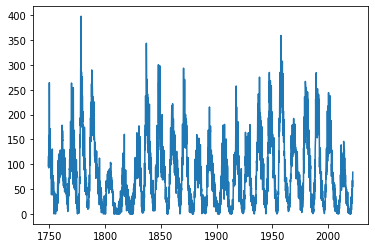

In [73]:
%matplotlib inline 
from matplotlib import pyplot as plt 
plt.plot(sunspots[:, 2], sunspots[:,3])

From the information on columns in the website, we can specifcy in the formatter:

In [74]:
spots = requests.get("http://www.sidc.be/silso/INFO/snmtotcsv.php", stream=True)

sunspots = np.genfromtxt(
    spots.raw,
    delimiter=";",
    names=["year", "month", "date", "mean", "deviation", "observations", "definitive"],
)
sunspots

array([(1749., 1., 1749.042,  96.7, -1. , -1.000e+00, 1.),
       (1749., 2., 1749.123, 104.3, -1. , -1.000e+00, 1.),
       (1749., 3., 1749.204, 116.7, -1. , -1.000e+00, 1.), ...,
       (2022., 2., 2022.122,  59.7, 13.1,  1.044e+03, 0.),
       (2022., 3., 2022.204,  78.5, 13.9,  1.277e+03, 0.),
       (2022., 4., 2022.286,  84.1, 15.2,  1.237e+03, 0.)],
      dtype=[('year', '<f8'), ('month', '<f8'), ('date', '<f8'), ('mean', '<f8'), ('deviation', '<f8'), ('observations', '<f8'), ('definitive', '<f8')])

#### Typed Fields

It is also good to specify the datatype of each field.

In [75]:
spots = requests.get("http://www.sidc.be/silso/INFO/snmtotcsv.php", stream=True)

sunspots = np.genfromtxt(
    spots.raw,
    delimiter=";",
    names=["year", "month", "date", "mean", "deviation", "observations", "definitive"],
    dtype=[int, int, float, float, float, int, int],
)
sunspots

array([(1749, 1, 1749.042,  96.7, -1. ,   -1, 1),
       (1749, 2, 1749.123, 104.3, -1. ,   -1, 1),
       (1749, 3, 1749.204, 116.7, -1. ,   -1, 1), ...,
       (2022, 2, 2022.122,  59.7, 13.1, 1044, 0),
       (2022, 3, 2022.204,  78.5, 13.9, 1277, 0),
       (2022, 4, 2022.286,  84.1, 15.2, 1237, 0)],
      dtype=[('year', '<i8'), ('month', '<i8'), ('date', '<f8'), ('mean', '<f8'), ('deviation', '<f8'), ('observations', '<i8'), ('definitive', '<i8')])

Since now NumPy understand columns names, the plot command can be made more readable:

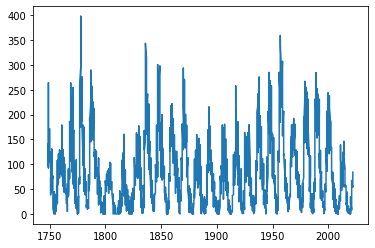

In [76]:
plt.plot(sunspots["year"], sunspots["mean"])

## Structured data: JSON and YAML

CSV files can only model data where each record has several fields, and each field is a simple datatype, a string or number. Sometimes, we want to store data which is more complicated, with nested structures of lists and dictionaries.

### JSON

JSON is a very common data format to store structured data. Any nested group of dictionaries and lists can be saved.

In [77]:
import json
mydata = {"key": ["value1", "value2"], "key2": {"key4": "value3"} }
json.dumps(mydata)

'{"key": ["value1", "value2"], "key2": {"key4": "value3"}}'

For a more redable output, we can use the ```indent``` argument.

In [78]:
print(json.dumps(mydata, indent = 4))

{
    "key": [
        "value1",
        "value2"
    ],
    "key2": {
        "key4": "value3"
    }
}


Loading data is also quite easy.

In [79]:
%%writefile myfile.json
{"somekey": ["a list", "with values"]}

Overwriting myfile.json


In [80]:
with open('myfile.json', 'r') as f:
    mydataasstring = f.read()
mydataasstring

'{"somekey": ["a list", "with values"]}\n'

In [81]:
mydata = json.loads(mydataasstring)
mydata["somekey"]

['a list', 'with values']

### YAML

YAML is a very similar data format to JSON, with some nice additions:
* No need to quote string if they don't have funny characters,
* Can have comment lines
* Can write dictionaries without the curly brackets
* Can write lists like:

In [82]:
%%writefile myfile.yaml 
somekey:
    - a list 
    - with values 

Overwriting myfile.yaml


In [83]:
# !pip install pyyaml

In [84]:
import yaml
with open("myfile.yaml") as myfile:
    mydata = yaml.safe_load(myfile)
print(mydata)

{'somekey': ['a list', 'with values']}


## Plotting with Matplotlib

In [85]:
from matplotlib import pyplot as plt 

In [86]:
%matplotlib inline

```%matplotlib inline``` tells the Jupyter notebook to show figures we generate alongside the code that created it, rather than in a separate window.

Lines beginning with a single `%` are not python code, but control how the notebook deals with python code.

Lines beginning with two `%` are "cell magics" that tell the notebook how to interpret the particular cell, e.g. `%%writefile`.

### Basic plot

The plot command returns a figure, and the notebook displays it.

We can get the figure object and manipulate it to add title, axis labels... Matplotlib allows for convenience to issue commands to change the "current figure".

However, this forces us to keep all commands in a single cell, and makes things cumbersome for many figures. Matplotlib defines some types we can use to treat individual figures as variables, and manipulate these.

Text(0.5, 1.0, 'Figure')

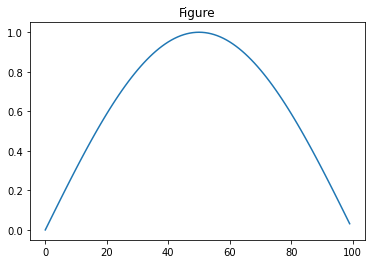

In [87]:
from math import sin, cos, pi
myfig = plt.plot([sin(pi * x / 100.) for x in range(100)])
plt.title("Figure")

### Figures and Axes

We often want multiple graphs in a single figure.

Matplotlib divides a `figure` object into axes: each pair of axes is one subplot. 

To get a boring figure with just one pair of axes, we can just ask for a default new figure with brand new axes.


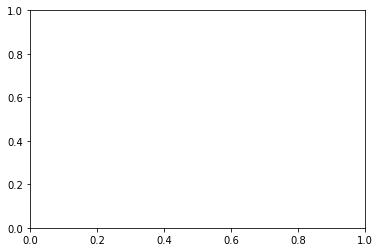

In [88]:
sine_graph, sine_graph_axes = plt.subplots()

Once we have some axes, we can plot a graph on them.

In [89]:
sine_graph_axes.plot([sin(pi * x / 100.) for x in range(100)], label ='sin(x)')

We can add a title to a pair of axes.

In [90]:
sine_graph_axes.set_title("My graph")

Text(0.5, 1.0, 'My graph')

In [91]:
sine_graph_axes.set_ylabel("f(x)")

Text(3.200000000000003, 0.5, 'f(x)')

In [92]:

sine_graph_axes.set_xlabel("100 x")

Text(0.5, 3.1999999999999993, '100 x')

Now, we need to actually display the figure. 

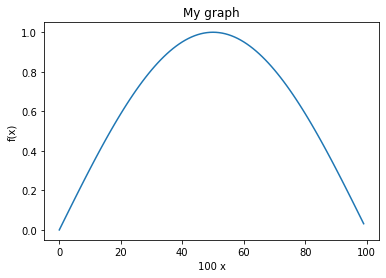

In [93]:
sine_graph

We can add another curve.

In [94]:
sine_graph_axes.plot([cos(pi * x / 100.) for x in range(100)], label = 'cos(x)')

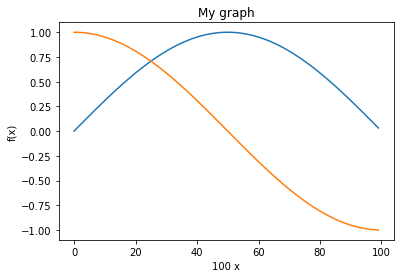

In [95]:
sine_graph

Add a legend to distinguish the curves:

In [96]:
sine_graph_axes.legend()

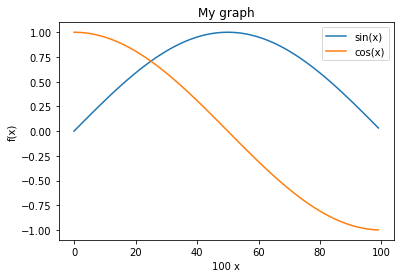

In [97]:
sine_graph

#### Saving figures

In [98]:
sine_graph.savefig("mygraph.png")

### Subplots

We might have wanted the sin and cos graphs on separate axes.

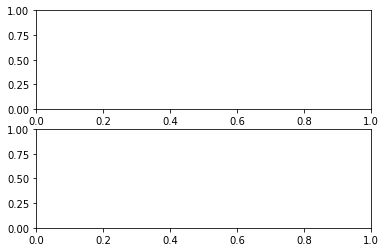

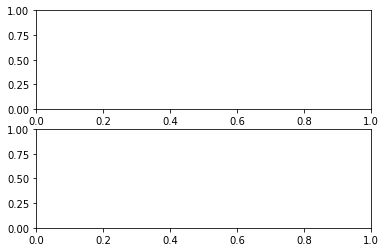

In [99]:
double_graph = plt.figure()
sin_axes = double_graph.add_subplot(2,1,1)
# 2 rows 1 column 1st subplot
cos_axes = double_graph.add_subplot(2,1,2)
double_graph

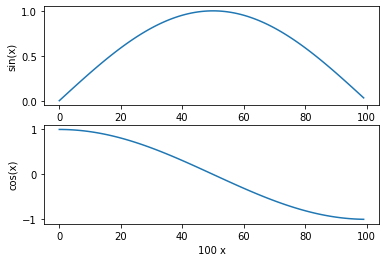

In [100]:
sin_axes.plot([sin(pi * x / 100.0) for x in range(100)])
sin_axes.set_ylabel("sin(x)")
cos_axes.plot([cos(pi * x / 100.0) for x in range(100)])
cos_axes.set_ylabel("cos(x)")
cos_axes.set_xlabel("100 x")
double_graph

### Versus plots

When we specify a single ```list``` to `plot`, the x-values are just the array index number. We usually want to plot something more meaningful.

Text(0.5, 0, 'x')

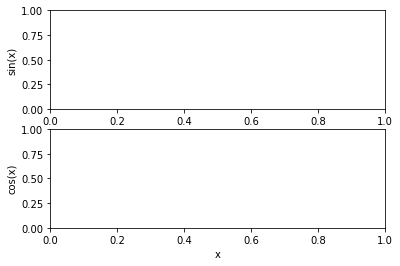

In [101]:
double_graph = plt.figure()
sin_axes = double_graph.add_subplot(2, 1, 1)
cos_axes = double_graph.add_subplot(2, 1, 2)
cos_axes.set_ylabel("cos(x)")
sin_axes.set_ylabel("sin(x)")
cos_axes.set_xlabel("x")

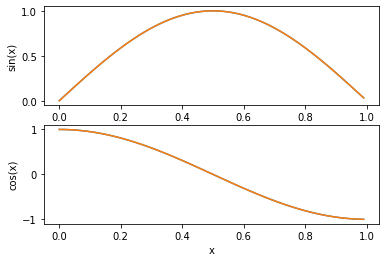

In [103]:
sin_axes.plot(
    [x / 100.0 for x in range(100)], [sin(pi * x / 100.0) for x in range(100)]
)
cos_axes.plot(
    [x / 100.0 for x in range(100)], [cos(pi * x / 100.0) for x in range(100)]
)
double_graph

## NumPy

### The scientific Python Trilogy
* Matplotlib, plotting library
* Numpy, fast matrix math library
* IPython, precursor of notebook

### Limitations of Python Lists

Normal Python lists are one-dimensional. A matrix needs to nest Python list.



In [104]:
x = [list(range(5)) for N in range(5)]
x

[[0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4],
 [0, 1, 2, 3, 4]]

In [105]:
x[2][2]

2

Applying an operation to every element is painful.


In [106]:
# x+5: TypeError
[[elem + 5 for elem in row] for row in x]


[[5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9],
 [5, 6, 7, 8, 9]]

Common useful operations like transposing a matrix or reshaping are not easy in vanilla Python.

### The NumPy array

In [108]:
import numpy as np

my_array = np.array(range(5))
my_array

array([0, 1, 2, 3, 4])

In [109]:
for element in my_array:
    print("Hello" * element)


Hello
HelloHello
HelloHelloHello
HelloHelloHelloHello


For np arrays, you typically don't change the data size once you4ve defined your array (while this is easy in Python lists), but in return:

### Elementwise operations

Most operations can be applied element-wise automatically, and those vectorized operations are very fast.

In [110]:
my_array + 2

array([2, 3, 4, 5, 6])

In [112]:
big_list = range(1000)
big_array = np.arange(1000)

In [113]:
%%timeit 
[x ** 2 for x in big_list]

205 µs ± 568 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [115]:
%%timeit 
big_array ** 2

532 ns ± 5.39 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


### Arange and linspace

Np has two easy methods for definining floating-point evenly spaced arrays.


In [117]:
x = np.arange(0, 10, 0.1)  # Start, stop, step size
y = list(range(0, 10)) # only works for integer increments

### Multi-Dimensional arrays

In [118]:
np.zeros([3, 4, 2])  # 3 arrays with 4 rows and 2 columns each


array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

Unlike list of lists in Python, we can reshape arrays.

In [119]:
x = np.array(range(40))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [120]:
y = x.reshape([4, 5, 2])
y

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9]],

       [[10, 11],
        [12, 13],
        [14, 15],
        [16, 17],
        [18, 19]],

       [[20, 21],
        [22, 23],
        [24, 25],
        [26, 27],
        [28, 29]],

       [[30, 31],
        [32, 33],
        [34, 35],
        [36, 37],
        [38, 39]]])

In [121]:
y[3,2,1]

35

We can also select specific axes and subselect ranges:

In [122]:
y[:, 2, 1]

array([ 5, 15, 25, 35])

In [123]:
y[2:, :1, :]  # Last 2 axes, 1st row, all columns

array([[[20, 21]],

       [[30, 31]]])

In [124]:
y.transpose()


array([[[ 0, 10, 20, 30],
        [ 2, 12, 22, 32],
        [ 4, 14, 24, 34],
        [ 6, 16, 26, 36],
        [ 8, 18, 28, 38]],

       [[ 1, 11, 21, 31],
        [ 3, 13, 23, 33],
        [ 5, 15, 25, 35],
        [ 7, 17, 27, 37],
        [ 9, 19, 29, 39]]])

In [126]:
y.shape

(4, 5, 2)

In [128]:
y.transpose().shape

(2, 5, 4)

Some np functions apply by default to the whole array, but can be chosen to act only on certain axes.

In [130]:
x = np.arange(12).reshape(4,3)
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [132]:
x.mean(1)  
# Mean along the second axis, leaving the first.

array([ 1.,  4.,  7., 10.])

In [134]:
x.mean(0)  
# Mean along the first axis, leaving the second.

array([4.5, 5.5, 6.5])

In [135]:
x.mean()  # mean of all axes

5.5

### Array Datatypes 

A python `list` can contain data of mixed type, but a numpy array always contains one datatype.

### Broadcasting

By default, array operations are element-by-element.

In [136]:
np.arange(5) * np.arange(5)

array([ 0,  1,  4,  9, 16])

Multiplying arrays with non matching shapes generates error. Arrays must match in all dimensions in order to be compatible.

In [137]:
# np.arange(5) * np.arange(6)
# ValueError: operands could not be broadcast 
# together with shapes (5,) (6,) 


Except if ine array has any Dimension 1, then the data is repeated to match the other.

In [138]:
col = np.arange(10).reshape([10, 1])
col

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [139]:
col.shape

(10, 1)

### Newaxis

NumPy allows indexing with `np.newaxis` to temporarily create new one-long dimensions on the fly.

In [140]:
import numpy as np

x = np.arange(10).reshape(2, 5)
y = np.arange(8).reshape(2, 2, 2)

In [141]:
x

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [142]:
y

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [143]:
x_dash = x[:, :, np.newaxis, np.newaxis]
x_dash.shape

(2, 5, 1, 1)

In [144]:
y_dash = y[:, np.newaxis, :, :]
y_dash.shape

(2, 1, 2, 2)

### Dot products using broadcasting



In [145]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [146]:
b = np.arange(3, 12).reshape(3, 3)
b

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [147]:
a * b

array([[ 0,  4, 10],
       [18, 28, 40],
       [54, 70, 88]])

### Dot products using numpy functions

In [148]:
np.dot(a,b)

array([[ 24,  27,  30],
       [ 78,  90, 102],
       [132, 153, 174]])

In [149]:
a.dot(b)

array([[ 24,  27,  30],
       [ 78,  90, 102],
       [132, 153, 174]])

### Record Arrays

Special array structure designed to match the CSV record and field model. 

### logical arrays, masking and selection

Numpy defines operators like `==` and `<` to apply to arrays element by element. 



In [150]:
x = np.zeros([3, 4])
x
y = np.arange(-1, 2)[:, np.newaxis] * np.arange(-2, 2)[np.newaxis, :]
y
iszero = x == y
iszero

array([[False, False,  True, False],
       [ True,  True,  True,  True],
       [False, False,  True, False]])

### Numpy memory

Numpy memory management can be tricky: it does not behave like lists!

In [151]:
x = np.arange(5)
y = x[:]
y[2] = 0
x

array([0, 1, 0, 3, 4])

In [152]:
x = list(range(5))
y = x[:]
y[2] = 0
x

[0, 1, 2, 3, 4]

We must use ``np.copy`` to force separate memory. Otherwise, np tries to make slices be views on data.

## The Boids! Animations with Matplotlib.